In this notebook I'm going to make the P(50%ile echoes) as Nechoes and Ncalls changes. 


In [111]:
import copy
import glob
import matplotlib.pyplot as plt 
plt.rcParams['agg.path.chunksize'] = 10000
import numpy as np 
import os
import pickle 

from the_cocktail_party_nightmare_MC import calc_echoes2Pgeqechoes

In [2]:
% matplotlib notebook

In [4]:
dirname = !echo %cd%

In [7]:
dirname[0]

'C:\\Users\\tbeleyur\\Google Drive\\Holger Goerlitz- IMPRS\\PHD_2015\\projects and analyses\\2016_jamming response modelling\\analytical_modelling'

In [11]:
folder = os.path.join(dirname[0], 'results','the_CPN_numechoes_data','theCPN_data_median_prob','')

In [12]:
folder

'C:\\Users\\tbeleyur\\Google Drive\\Holger Goerlitz- IMPRS\\PHD_2015\\projects and analyses\\2016_jamming response modelling\\analytical_modelling\\results\\the_CPN_numechoes_data\\theCPN_data_median_prob\\'

In [29]:
all_echoes_files = glob.glob(folder+'all_echoes*')
all_echoes_files

['C:\\Users\\tbeleyur\\Google Drive\\Holger Goerlitz- IMPRS\\PHD_2015\\projects and analyses\\2016_jamming response modelling\\analytical_modelling\\results\\the_CPN_numechoes_data\\theCPN_data_median_prob\\all_echoes_record_1to17.pkl',
 'C:\\Users\\tbeleyur\\Google Drive\\Holger Goerlitz- IMPRS\\PHD_2015\\projects and analyses\\2016_jamming response modelling\\analytical_modelling\\results\\the_CPN_numechoes_data\\theCPN_data_median_prob\\all_echoes_record_25to31.pkl',
 'C:\\Users\\tbeleyur\\Google Drive\\Holger Goerlitz- IMPRS\\PHD_2015\\projects and analyses\\2016_jamming response modelling\\analytical_modelling\\results\\the_CPN_numechoes_data\\theCPN_data_median_prob\\all_echoes_tablePC_17_to_25.pkl']

In [30]:
def load_data_from_pkl(pkl_file):
    with open(pkl_file, 'r') as pickled_dict:
        output_dict = pickle.load(pickled_dict)
    return(output_dict)

In [100]:
def make_into_dictionary(mixed_list):
    echoes_heard = {}
    for each_run in mixed_list:
        call_density, num_echoes_heard = each_run
        echoes_heard[call_density] = num_echoes_heard
    return(echoes_heard)

In [108]:
def combine_multiple_dicts(dict_list):
    all_echoes = {}
    for each_dict in dict_list:
        all_echoes.update(each_dict)
    return(all_echoes)
    

In [101]:
all_echoes_data = [load_data_from_pkl(each_echo_file) for each_echo_file in all_echoes_files]

In [105]:
all_echo_dicts = [make_into_dictionary(each) for each in all_echoes_data]

In [109]:
all_echoes = combine_multiple_dicts(all_echo_dicts)

In [163]:
median_echoes_w_calls = {}
for num_echoes, results in all_echoes.iteritems():
    median_echoes = int(np.median(np.arange(1,num_echoes+1)))
    p_hearing_median = np.apply_along_axis(calc_echoes2Pgeqechoes, 1, results, num_echoes, median_echoes)
    median_echoes_w_calls[num_echoes] = p_hearing_median

In [169]:
total_treatments = np.arange(1,33,2).size
median_probs = np.zeros((total_treatments, total_treatments))
for i, each_echo_density in enumerate(np.sort(median_echoes_w_calls.keys())):
    median_probs[i,:] = median_echoes_w_calls[each_echo_density]
    

In [182]:
median_probs.shape

(16L, 16L)

In [183]:
np.arange(1,33,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])

<IPython.core.display.Javascript object>


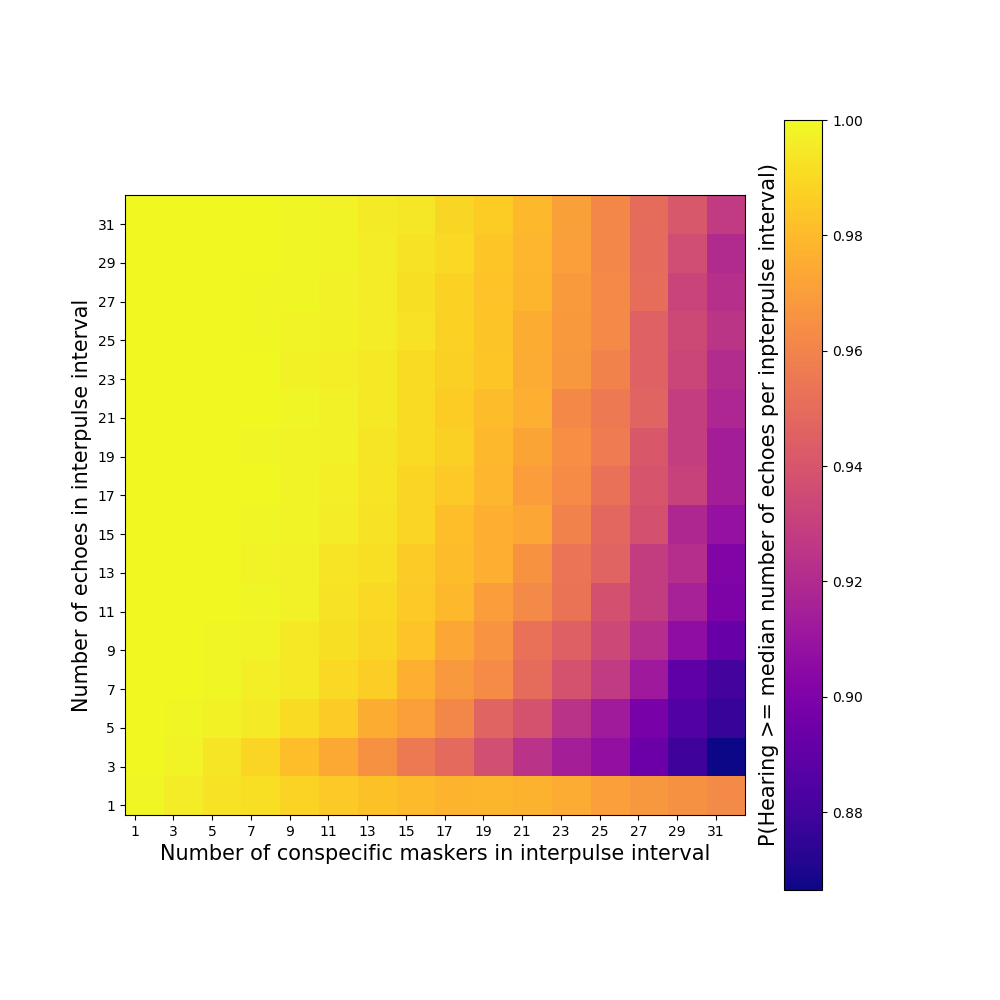

In [276]:
plt.figure(figsize=(10,10))
plt.imshow(median_probs, aspect='equal', cmap='plasma', origin='lower',extent=[0.5,32.5,0.5,32.5])
cbar = plt.colorbar(); ticks=np.arange(1,33,2); plt.gca().set_xticks(ticks); plt.gca().set_yticks(ticks)
cbar.set_label('P(Hearing >= median number of echoes per inpterpulse interval)', rotation=90, labelpad=-75, fontsize=15)
plt.xlabel('Number of conspecific maskers in interpulse interval', fontsize=15);
plt.ylabel('Number of echoes in interpulse interval', fontsize=15)
plt.show()